# <span style="color:brown"><center>**Yannick NOUDJOUKOUANG**</center></span>

### <center>``JEDHA (FULLSTACK - 2021)``</center>

---
---

# <h1 style="color:blue"><center>**SPEED DATING PROJECT**</center></h1>
## <center>``(DATA ANALYSIS & DATABASE MANIPULATION)``</center>

---


## <span>**PLAN**</span>

>1. Introduction
2. Methodology
3. Data Analysis
4. Conclusions

---


### **1. Introduction**

The dataset **speed dating** is the output of an experiment from the Columbia Business School (USA) that tries to find out what influences "Love" at first sight.

*Good to know:*
- The experimental speed dating events occured from 2002-2004. 
- The first date duration is "four minutes" with every other participant of the opposite sex. 
- The participants were asked if they would like to see their date again. 
- They were also asked to rate their date partner and also share their own expectations and attributes for matching.

This dataset contains **195 columns** & **6837 rows**.

The target will be to ***highlight the mechanisms or candidates' characteristics that transform a match during the speed dating session into a real date aftermath.***

*We have decided to briefly give an overview of the structural drivers (candidates, gender, age etc) of this event then we will focus our data analysis on:*

1. The group that get at least one match and one date 
2. What are the inner reasons that foster getting a date from a match


Find [here](https://www.kaggle.com/annavictoria/speed-dating-experiment) the link to access the dataset **speed dating** : 

---


### **2. Methodology**

*The Methodology will be declined upon the below elements :*

1. We are going to use a "funnel" approach, starting from the full dataset and then apply features selection based on the ongoing analysis.

2. Back and forth analysis, removals, additions, inputs and observations might be applied in order to get the most robust hypothesis possible

3. Provide a conclusion based on the observations performed during the whole analysis

---



### **3. Data Analysis**

## A) IMPORT THE NECESSARY LIBRARIES

In [1]:
!pip install plotly -q #import Plotly

In [2]:
!pip install missingno -q

In [3]:
import pandas as pd #To read csv & Excel file and manipulate data and tables
import numpy as np #To apply a numeric format to perform complex calculation
import seaborn as sns #To provide data visualization
import matplotlib.pyplot as plt #To provide data visualization
import missingno as mi


## B) OPEN THE CSV FILE (PANDAS)

In [4]:
df  = pd.read_csv('Speed_Dating_Data.csv', encoding ='ISO-8859-1')
pd.set_option('display.max_columns', None) #Allow to show all the columns

In [5]:
display(df.head())
print(df.shape)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0

(6837, 195)


In [6]:
#Creation of an alternative DataFrame to perform all the analysis and safeguard core data in case comparison
dfa = df

## C) CLEANNING PROCESS

### 1. First round selection : select columns to be kept


In [7]:
dfa.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [8]:
dfa = dfa[['iid',
               'gender',
                   'condtn',
                       'wave',
                           'round',
                               'pid',
                                   'match',
                                       "int_corr",
                                           'samerace',
                                               'age_o',
           'race_o',
               'age',
                   'field_cd',
                       'race',
                           'imprace',
                               'imprelig',
                                   'from',
                                       'income',
                                           'date',
                                               'go_out',
           'career_c',
               'numdat_2',
                   'you_call',
                       'them_cal',
                           'date_3',
                               'attr1_3',
                                   'sinc1_3',
                                       'intel1_3',
                                           'fun1_3',
                                               'amb1_3',
           'shar1_3',
               'attr3_3',
                   'sinc3_3',
                       'intel3_3',
                           'fun3_3',
                               'amb3_3']]


In [9]:
dfa.shape

(6837, 36)

We now have only **36** remaining features over **195** initially.

### 2. Change columns' labels name for more clarity

In [10]:

dfa = dfa.rename(columns={"iid": "candidate_id",
                             "condtn": "choice",
                                 "round": "candidates_wave",
                                     "pid":"partner_id",
                                         "int_corr":"canidates_correl",
                                                "samerace":"equal_race",
                                                    "age_o":"age_partner",
                                                         "race_o":"race_partner",
                         "age":"age_candidate",
                            "field_cd":"field_of_study",
                                 "race":"race_candidate",
                                     "imprace":"race_importance",
                                         "imprelig":"religion_importance",
                                            "from" : "city",
                                             "date":"date_frequence",
                                                 "go_out":"go_out_frequence",
                                                     "career_c":"career_candidate",
                                                         "numdat_2":"nbr_dates",
                         "you_call":"callback_to_match",
                             "them_cal":"callback_from_match",
                                 "date_3":"dateafter_callmatch",
                                     "attr1_3":"lookfor_attractive",
                                         "sinc1_3":"lookfor_sincere",
                                             "intel1_3":"lookfor_intelligent",
                                                 "fun1_3":"lookfor_fun",
                                                     "amb1_3":"lookfor_ambitious",
                                                        "shar1_3":"lookfor_sharedint",        
                                                            "attr3_3":"ownattributes_attractive",
                         "sinc3_3":"ownattributes_sincere",
                             "intel3_3":"ownattributes_intelligent",
                                "fun3_3":"ownattributes_fun",
                                     "amb3_3":"ownattributes_ambitious",
                         "shar3_3":"ownattributes_sharedint"                                     
                        
                        })

In [11]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6837 entries, 0 to 6836
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   candidate_id               6837 non-null   int64  
 1   gender                     6837 non-null   int64  
 2   choice                     6837 non-null   int64  
 3   wave                       6837 non-null   int64  
 4   candidates_wave            6837 non-null   int64  
 5   partner_id                 6827 non-null   float64
 6   match                      6837 non-null   int64  
 7   canidates_correl           6679 non-null   float64
 8   equal_race                 6837 non-null   int64  
 9   age_partner                6755 non-null   float64
 10  race_partner               6764 non-null   float64
 11  age_candidate              6764 non-null   float64
 12  field_of_study             6754 non-null   float64
 13  race_candidate             6773 non-null   float

### 3. Transforming "income" column into float 


In [12]:
#remove the comma(s) from string type
dfa['income'] = dfa['income'].str.replace(",","")

#Change column "income" to float
dfa['income'] = dfa['income'].astype('float')

### 4. Getting a view and basic understanding on the specific columns


In [13]:
dfa.describe(include='all')

,candidate_id,gender,choice,wave,candidates_wave,partner_id,match,canidates_correl,equal_race,age_partner,race_partner,age_candidate,field_of_study,race_candidate,race_importance,religion_importance,city,income,date_frequence,go_out_frequence,career_candidate,nbr_dates,callback_to_match,callback_from_match,dateafter_callmatch,lookfor_attractive,lookfor_sincere,lookfor_intelligent,lookfor_fun,lookfor_ambitious,lookfor_sharedint,ownattributes_attractive,ownattributes_sincere,ownattributes_intelligent,ownattributes_fun,ownattributes_ambitious
count,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,6827.000000,6837.000000,6679.000000,6837.000000,6755.000000,6764.000000,6764.000000,6754.000000,6773.000000,6757.000000,6757.000000,6757,3570.000000,6739.000000,6757.000000,6698.000000,6060.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,232.077519,0.498318,1.808249,9.337136,16.458681,232.261608,0.168056,0.194965,0.411438,26.383124,2.701064,26.391780,7.541753,2.701314,3.816043,3.764540,NaN,45350.371709,5.003710,2.137043,5.086892,2.334158,0.759275,0.991236,0.379492,23.606223,16.696766,19.610193,16.263976,11.302644,12.769907,7.263804,8.113351,8.482033,7.664914,7.430032
std,127.215878,0.500034,0.393707,4.668218,4.141718,127.297280,0.373944,0.303505,0.492130,3.575003,1.217301,3.663984,3.668370,1.214621,2.879316,2.842584,NaN,16879.651378,1.426174,1.095844,3.184005,0.635154,1.658765,1.390640,0.485331,13.308518,7.385145,6.161362,4.986551,5.712772,6.480938,1.577789,1.588424,1.425599,1.752735,1.988056
min,1.000000,0.000000,1.000000,1.000000,5.000000,1.000000,0.000000,-0.830000,0.000000,18.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,NaN,8607.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,2.000000,1.000000
25%,117.000000,0.000000,2.000000,5.000000,14.000000,117.000000,0.000000,-0.010000,0.000000,24.000000,2.000000,24.000000,5.000000,2.000000,1.000000,1.000000,NaN,31516.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,15.220000,14.580000,16.670000,15.000000,7.660000,10.000000,7.000000,7.000000,8.000000,7.000000,6.000000
50%,235.000000,0.000000,2.000000,10.000000,18.000000,235.000000,0.000000,0.210000,0.000000,26.000000,2.000000,26.000000,8.000000,2.000000,3.000000,3.000000,NaN,43664.000000,5.000000,2.000000,6.000000,2.000000,0.000000,1.000000,0.000000,20.000000,16.670000,20.000000,16.670000,10.000000,14.290000,7.000000,8.000000,8.000000,8.000000,8.000000
75%,346.000000,1.000000,2.000000,14.000000,20.000000,346.000000,0.000000,0.430000,1.000000,28.000000,4.000000,28.000000,10.000000,4.000000,6.000000,6.000000,NaN,55080.000000,6.000000,3.000000,7.000000,3.000000,1.000000,1.000000,1.000000,30.000000,20.000000,20.000000,20.000000,15.220000,16.670000,8.000000,9.000000,9.000000,9.000000,9.000000


In [14]:
#Show unique value per column
dfa.nunique()

candidate_id                 458
gender                         2
choice                         2
wave                          18
candidates_wave               12
partner_id                   458
match                          2
canidates_correl             149
equal_race                     2
age_partner                   23
race_partner                   5
age_candidate                 24
field_of_study                17
race_candidate                 5
race_importance               11
religion_importance           10
city                         235
income                       219
date_frequence                 7
go_out_frequence               7
career_candidate              16
nbr_dates                      3
callback_to_match              9
callback_from_match            8
dateafter_callmatch            2
lookfor_attractive            56
lookfor_sincere               47
lookfor_intelligent           44
lookfor_fun                   53
lookfor_ambitious             56
lookfor_sh

### 5. Replacing the proper categorial values for a better clarity

In [15]:
# Input gender Female & Male
dfa['gender'] = dfa['gender'].apply(lambda x: 'Female' if x == 0 else 'Male' if x ==1 else x)

# Input gender the choice given per wave
dfa['choice'] = dfa['choice'].apply(lambda x: 'limited choice' if x == 1 else 'extensive choice')

# Input match Yes or No
dfa['match'] = dfa['match'].apply(lambda x: 'No' if x == 0 else 'Yes')

# Input equal race from partner
dfa['equal_race'] = dfa['equal_race'].apply(lambda x: 'No' if x == 0 else 'Yes')

# Input race of partner
dfa['race_partner'] = dfa['race_partner'].apply(lambda x: 'Black/African' if x == 1 
                                                else 'European/Caucasian' if x == 2 
                                                else 'Latino/Hispanic' if x == 3
                                                else 'Asian/Pacific/Islander' if x == 4
                                                else 'Native American' if x == 5
                                                else 'other' if x == 6
                                                else  x
                                                )

# Input field of study from partner
dfa['field_of_study'] = dfa['field_of_study'].apply(lambda x: 'Law' if x == 1 
                                                    else 'Math' if x == 2 
                                                    else 'Social Science, Psychologist' if x == 3
                                                    else 'Medical Science, Pharmaceuticals' if x == 4
                                                    else 'Engineering' if x == 5
                                                    else 'Writing/Journalism' if x == 6
                                                    else 'History/Religion/Philosophy ' if x == 7
                                                    else 'Business/Econ/Finance' if x == 8
                                                    else 'Education,Academia' if x == 9
                                                    else 'Biological Sciences/Chemistry/Physics' if x == 10
                                                    else 'Social Work' if x == 11
                                                    else 'Undergrad/undecided' if x == 12
                                                    else 'Political Science/International Affairs' if x == 13
                                                    else 'Film' if x == 14
                                                    else 'Fine Arts/Arts Administration' if x == 15
                                                    else 'Languages' if x == 16
                                                    else 'Architecture' if x == 17
                                                    else 'other' if x == 18
                                                    else  x 
                                                   
                                                   )


# Input race of candidate
dfa['race_candidate'] = dfa['race_candidate'].apply(lambda x: 'Black/African' if x == 1 
                                                else 'European/Caucasian' if x == 2 
                                                else 'Latino/Hispanic' if x == 3
                                                else 'Asian/Pacific/Islander' if x == 4
                                                else 'Native American' if x == 5
                                                else 'other' if x == 6
                                                else  x
                                                )

# Input date frequency 
dfa['date_frequence'] = dfa['date_frequence'].apply(lambda x: 'Several times a week' if x == 1 
                                                else 'Twice a week' if x == 2 
                                                else 'Once a week' if x == 3
                                                else 'Twice a month' if x == 4
                                                else 'Once a month' if x == 5
                                                else 'Several times a year' if x == 6  
                                                else  'Almost never' if x == 7
                                                else x
                                                )

# Input go out frequency 
dfa['go_out_frequence'] = dfa['go_out_frequence'].apply(lambda x: 'Several times a week' if x == 1 
                                                else 'Twice a week' if x == 2 
                                                else 'Once a week' if x == 3
                                                else 'Twice a month' if x == 4
                                                else 'Once a month' if x == 5
                                                else 'Several times a year' if x == 6  
                                                else  'Almost never' if x == 7
                                                else x
                                                )

# Input field of study from candidate
dfa['career_candidate'] = dfa['career_candidate'].apply(lambda x: 'Law' if x == 1 
                                                    else 'Math' if x == 2 
                                                    else 'Social Science, Psychologist' if x == 3
                                                    else 'Medical Science, Pharmaceuticals' if x == 4
                                                    else 'Engineering' if x == 5
                                                    else 'Writing/Journalism' if x == 6
                                                    else 'History/Religion/Philosophy ' if x == 7
                                                    else 'Business/Econ/Finance' if x == 8
                                                    else 'Education,Academia' if x == 9
                                                    else 'Biological Sciences/Chemistry/Physics' if x == 10
                                                    else 'Social Work' if x == 11
                                                    else 'Undergrad/undecided' if x == 12
                                                    else 'Political Science/International Affairs' if x == 13
                                                    else 'Film' if x == 14
                                                    else 'Fine Arts/Arts Administration' if x == 15
                                                    else 'Languages' if x == 16
                                                    else 'Architecture' if x == 17
                                                    else 'other' if x == 18
                                                    else  x 
                                                   
                                                   )

dfa['career_candidate'] = dfa['career_candidate'].apply(lambda x: 'Law' if x == 1 
                                                    else 'Math' if x == 2 
                                                    else 'Social Science, Psychologist' if x == 3
                                                    else 'Medical Science, Pharmaceuticals' if x == 4
                                                    else 'Engineering' if x == 5
                                                    else 'Writing/Journalism' if x == 6
                                                    else 'History/Religion/Philosophy ' if x == 7
                                                    else 'Business/Econ/Finance' if x == 8
                                                    else 'Education,Academia' if x == 9
                                                    else 'Biological Sciences/Chemistry/Physics' if x == 10
                                                    else 'Social Work' if x == 11
                                                    else 'Undergrad/undecided' if x == 12
                                                    else 'Political Science/International Affairs' if x == 13
                                                    else 'Film' if x == 14
                                                    else 'Fine Arts/Arts Administration' if x == 15
                                                    else 'Languages' if x == 16
                                                    else 'Architecture' if x == 17
                                                    else 'other' if x == 18
                                                    else  x 
                                                   
                                                    )



### 6. Missing values management (when analytically applicable)


In [16]:
# Input missing values by mean method
dfa.loc[:,'age_candidate'] = dfa['age_candidate'].fillna(dfa['age_candidate'].mean())

## D) GENERAL FINDINGS & VISUALIZATIONS

In [17]:
### 1. Indepth data review

In [18]:
id_selection = dfa['candidate_id'].nunique()
print('The dataset shows that {} candidates have been part of the speed dating session.'.format(id_selection))

The dataset shows that 458 candidates have been part of the speed dating session.


In [19]:
#Count the number of Male & Female
male_female = dfa.groupby(['gender'])['candidate_id'].nunique()

nbr_female = male_female[0]
nbr_male = male_female[1]

print('In detail, we note that among {} candidates, {} are Female and {} are Male.'.format(id_selection,nbr_female,nbr_male))
print(' ')
print('The population looks quite balance that should not impact the result at the first look.')

In detail, we note that among 458 candidates, 231 are Female and 227 are Male.
 
The population looks quite balance that should not impact the result at the first look.


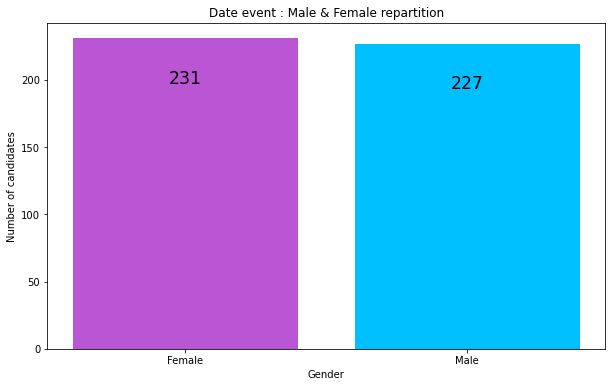

In [20]:
# Declaring indexes and values
gender_values = male_female.values
gender = male_female.index

# Male & Female repartition
plt.figure(figsize = (10, 6))

plt.text(gender[0],gender_values[0]*0.9, np.round(gender_values[0],2), ha = "center", va = "top", size='xx-large')
plt.text(gender[1],gender_values[1]*0.9, np.round(gender_values[1],2), ha = "center", va = "top", size='xx-large')

plt.bar(gender, gender_values, color=['mediumorchid', 'deepskyblue'])
plt.title("Date event : Male & Female repartition")
plt.xlabel("Gender")
plt.ylabel("Number of candidates")
plt.show()

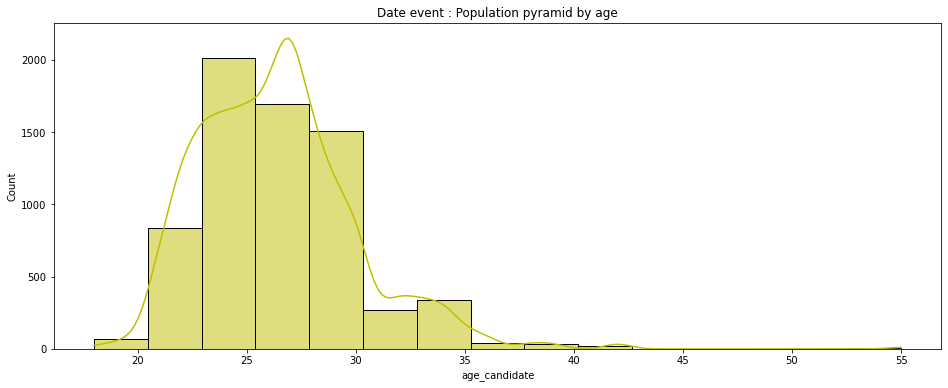


The histogram clearly demonstrates that the population is over represented into a range between 20 and 35 years


In [21]:
# Variable age distribution
plt.figure(figsize = (35, 6))
plt.subplot(1,2,2)
plt.title("Date event : Population pyramid by age")
sns.histplot(dfa['age_candidate'], bins=15, kde=True, color='y')
plt.show()
print('')
print('The histogram clearly demonstrates that the population is over represented into a range between 20 and 35 years')

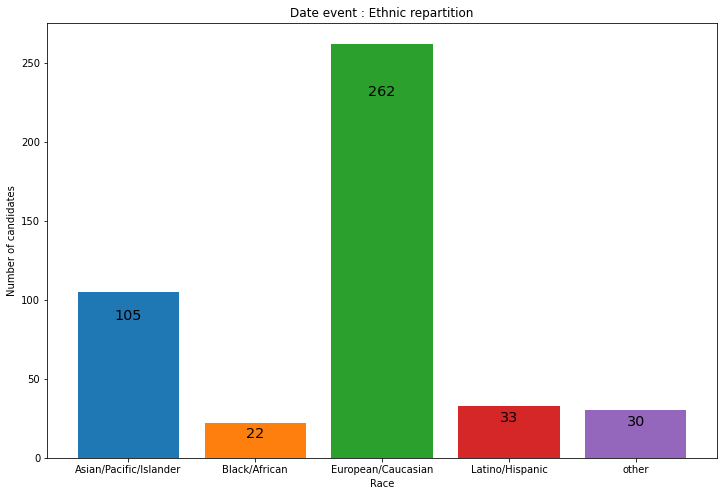

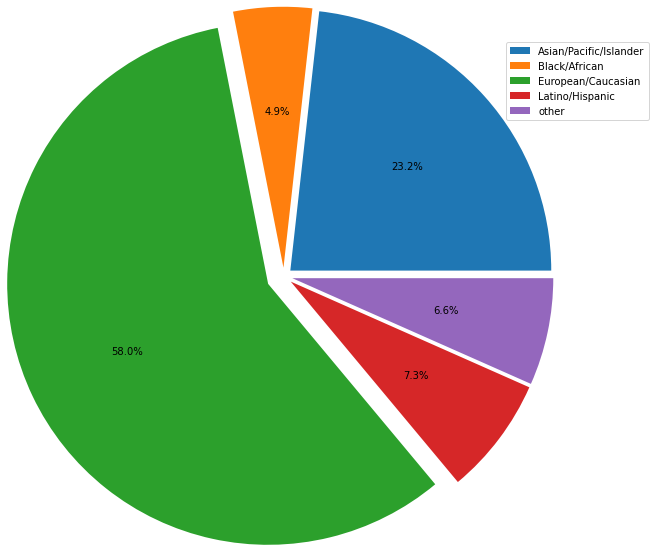

In [22]:
# Count of candidates per race
race_c = dfa.groupby(['race_candidate'])['candidate_id'].nunique()

# Declaring indexes and values
race_c_values = race_c.values
race_c_index = race_c.index

# Male & Female repartition
plt.figure(figsize = (12, 8))

for i in range(len(race_c.index)):
    plt.text(race_c.index[i],race_c[i]*0.9, np.round(race_c[i],2), ha = "center", va = "top", size='x-large')


plt.bar(race_c_index, race_c_values, color=['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple'])
plt.title("Date event : Ethnic repartition")
plt.xlabel("Race")
plt.ylabel("Number of candidates")
plt.show()

# Male & Female repartition

#plt.pie(race_c_index, race_c_values)
#plt.title("Date event : Ethnic repartition")
#plt.xlabel("Race")
#plt.ylabel("Number of candidates")


plt.figure(figsize = (10, 8))
plt.pie(
    race_c, 
    autopct = '%1.1f%%',
    shadow = False, 
    startangle = 0,
    explode = (0.05,0.05,0.1,0.05, 0.05),
    radius = 1.5 
       )

plt.legend(race_c_index, bbox_to_anchor=(1.0, 1.05))

plt.show()

In [23]:
print('1. White people are over represented with almost 60% of the candidates, followed by the asians (23%)')
print('2. Based on a study in 2019, \'Black/African\' (12.2%) and \'Latinos/Hispanic\' (18.5%) are under represented regarding the overall USA distribution')
print('3. Asians are over represented regarding the federal evaluation (5.6%)')

1. White people are over represented with almost 60% of the candidates, followed by the asians (23%)
2. Based on a study in 2019, 'Black/African' (12.2%) and 'Latinos/Hispanic' (18.5%) are under represented regarding the overall USA distribution
3. Asians are over represented regarding the federal evaluation (5.6%)


<Figure size 1440x1440 with 0 Axes>

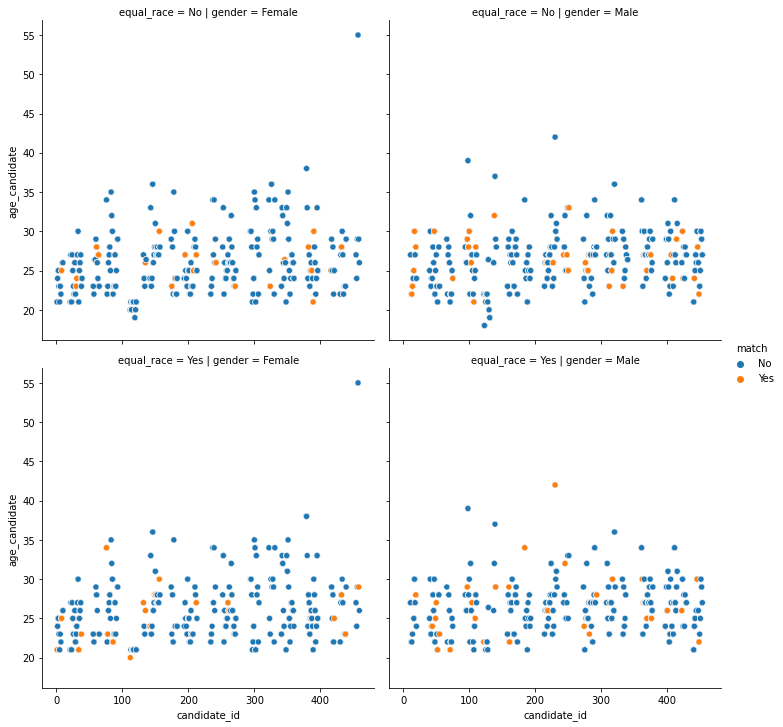

In [24]:
#Represents the dates by age
plt.figure(figsize = (20, 20))
sns.relplot(x = 'candidate_id' , y = 'age_candidate' , data = dfa, hue = 'match', col = 'gender', row = 'equal_race')

In [25]:
print('The graph above shows that there is no particular relation between the partner\'s race and a match.')
print(' ')
print('Matches over 30 years are almost inexistent.')

The graph above shows that there is no particular relation between the partner's race and a match.
 
Matches over 30 years are almost inexistent.


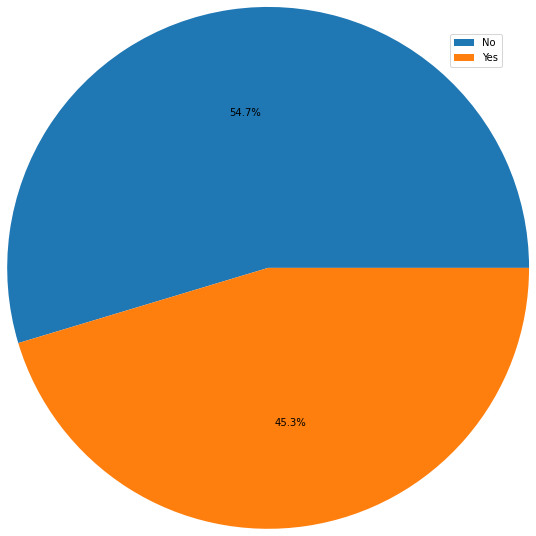

About 380 of the candidates got at least a match, it's quite high! TThis represent 45.3%.


In [26]:
#Count the number of Male & Female
matches = dfa.groupby(['match'])['candidate_id'].nunique()

matches_values = matches.values
matches_index = matches.index

plt.figure(figsize = (10, 8))
plt.pie(
    matches, 
    autopct = '%1.1f%%',
    shadow = False, 
    startangle = 0,
    radius = 1.5 
       )

plt.legend(matches_index, bbox_to_anchor=(1.05, 1.05))

plt.show()

print('About {} of the candidates got at least a match, it\'s quite high! TThis represent 45.3%.'.format(matches_values[1]))

In [27]:
study = dfa.groupby(['field_of_study'])['candidate_id'].nunique()
study

field_of_study
Architecture                                 1
Biological Sciences/Chemistry/Physics       48
Business/Econ/Finance                      117
Education,Academia                          37
Engineering                                 33
Film                                         6
Fine Arts/Arts Administration                5
History/Religion/Philosophy                 15
Languages                                    3
Law                                         46
Math                                        10
Medical Science, Pharmaceuticals             6
Political Science/International Affairs     39
Social Science, Psychologist                43
Social Work                                 25
Undergrad/undecided                          1
Writing/Journalism                          16
Name: candidate_id, dtype: int64

In [28]:
print('Because the field study are quite large, we intented to rationalized by grouping some field that are not numerically important.')

Because the field study are quite large, we intented to rationalized by grouping some field that are not numerically important.


### 2. Grouping "field of study", "go out" frequency and "go out for date" frequency


In [29]:
dfa2 = dfa

In [30]:
dfa2['career_candidate'] = dfa['career_candidate'].apply(lambda x: 'Law & Journalism' if x == 'Law' 
                                                    else 'Sciences/Engineering/Math' if x == 'Math' 
                                                    else 'Social Sciences' if x == 'Social Science, Psychologist'
                                                    else 'Sciences/Engineering/Math' if x == 'Medical Science, Pharmaceuticals'
                                                    else 'Sciences/Engineering/Math' if x == 'Engineering'
                                                    else 'Writing/Journalism' if x == 'Writing/Journalism'
                                                    else 'Education/Literary/History' if x == 'History/Religion/Philosophy'
                                                    else 'Business/Econ/Finance' if x == 'Business/Econ/Finance'
                                                    else 'Education/Literary/History' if x == 'Education,Academia'
                                                    else 'Sciences/Engineering/Math' if x == 'Biological Sciences/Chemistry/Physics'
                                                    else 'Entertainment/Socoal Network' if x == 'Social Work'
                                                    else 'other' if x == 'Undergrad/undecided'
                                                    else 'Political Sciences' if x == 'Political Science/International Affairs'
                                                    else 'Entertainment/Socoal Network' if x == 'Film'
                                                    else 'other' if x == 'Fine Arts/Arts Administration'
                                                    else 'other' if x == 'Languages'
                                                    else 'other' if x == 'Architecture'
                                                    else 'other' if x == 'other'
                                                    else  x 
                                                   
                                                   )

dfa2['field_of_study'] = dfa['field_of_study'].apply(lambda x: 'Law & Journalism' if x == 'Law' 
                                                    else 'Sciences/Engineering/Math' if x == 'Math' 
                                                    else 'Sciences/Engineering/Math' if x == 'Social Science, Psychologist'
                                                    else 'Sciences/Engineering/Math' if x == 'Medical Science, Pharmaceuticals'
                                                    else 'Sciences/Engineering/Math' if x == 'Engineering'
                                                    else 'other' if x == 'Writing/Journalism'
                                                    else 'Education/Literary/History' if x == 'History/Religion/Philosophy'
                                                    else 'Business/Econ/Finance' if x == 'Business/Econ/Finance'
                                                    else 'Education/Literary/History' if x == 'Education,Academia'
                                                    else 'Sciences/Engineering/Math' if x == 'Biological Sciences/Chemistry/Physics'
                                                    else 'Entertainment/Socoal Network' if x == 'Social Work'
                                                    else 'other' if x == 'Undergrad/undecided'
                                                    else 'Political Sciences' if x == 'Political Science/International Affairs'
                                                    else 'Entertainment/Socoal Network' if x == 'Film'
                                                    else 'other' if x == 'Fine Arts/Arts Administration'
                                                    else 'other' if x == 'Languages'
                                                    else 'other' if x == 'Architecture'
                                                    else 'other' if x == 'other'
                                                    else  x 
                                                   
                                                   )



# Input date frequency 
dfa2['date_frequence'] = dfa['date_frequence'].apply(lambda x: '1.Really often' if x == 'Several times a week' 
                                                else '2.0ften' if x == 'Twice a week' 
                                                else '3.Normal' if x == 'Once a week'
                                                else '4.Rarely' if x == 'Twice a month'
                                                else '4.Rarely' if x == 'Once a month'
                                                else '5.Extremely rarely' if x == 'Several times a year'  
                                                else  '5.Extremely rarely' if x == 'Almost never'
                                                else x
                                                )

# Input go out frequency 
dfa2['go_out_frequence'] = dfa['go_out_frequence'].apply(lambda x: '1.Really often' if x == 'Several times a week' 
                                                else '2.0ften' if x == 'Twice a week' 
                                                else '3.Normal' if x == 'Once a week'
                                                else '4.Rarely' if x == 'Twice a month'
                                                else '4.Rarely' if x == 'Once a month'
                                                else '5.Extremely rarely' if x == 'Several times a year'  
                                                else  '5.Extremely rarely' if x == 'Almost never'
                                                else x
                                                         
                                                )


In [31]:
study_resume = dfa2.groupby(['field_of_study'])['candidate_id'].nunique()
len(study_resume)

8

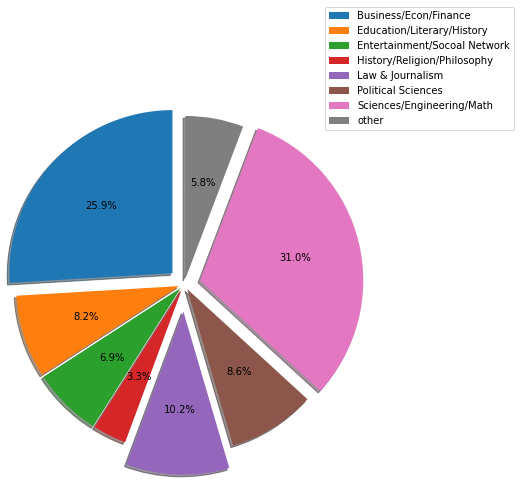

In [32]:
plt.figure(figsize = (12,5))
plt.pie(
    study_resume, 
    autopct = '%1.1f%%',
    shadow = True, 
    startangle = 90,
    explode = (0.15, 0.05, 0.05,0.05, 0.25, 0.05, 0.15, 0.05),
    radius = 1.5 
       )

plt.legend(study_resume.index, bbox_to_anchor=(1.0, 1.05))

In [33]:
print('About 67% of the candidates have studied Sciences (31%), Finance (26%) and Law/journalism (10%)')
print('Almost all the candidates are graduated or studying, which could means that candidates are part of the middle to upper class')

About 67% of the candidates have studied Sciences (31%), Finance (26%) and Law/journalism (10%)
Almost all the candidates are graduated or studying, which could means that candidates are part of the middle to upper class


In [34]:
study_resume_gender = dfa2.groupby(['gender','field_of_study'])['candidate_id'].nunique()
study_resume_gender.index

MultiIndex([('Female',        'Business/Econ/Finance'),
            ('Female',   'Education/Literary/History'),
            ('Female', 'Entertainment/Socoal Network'),
            ('Female', 'History/Religion/Philosophy '),
            ('Female',             'Law & Journalism'),
            ('Female',           'Political Sciences'),
            ('Female',    'Sciences/Engineering/Math'),
            ('Female',                        'other'),
            (  'Male',        'Business/Econ/Finance'),
            (  'Male',   'Education/Literary/History'),
            (  'Male', 'Entertainment/Socoal Network'),
            (  'Male', 'History/Religion/Philosophy '),
            (  'Male',             'Law & Journalism'),
            (  'Male',           'Political Sciences'),
            (  'Male',    'Sciences/Engineering/Math'),
            (  'Male',                        'other')],
           names=['gender', 'field_of_study'])

In [35]:
study_resume_gender.values

array([28, 33, 27,  8, 19, 19, 73, 20, 89,  4,  4,  7, 27, 20, 67,  6])

In [36]:
gender_resume = []
for i in range(len(study_resume_gender.index)):
    sex = study_resume_gender.index[i][0]
    gender_resume.append(sex)

study_resume = []
for i in range(len(study_resume_gender.index)):
    study = study_resume_gender.index[i][1]
    study_resume.append(study)

#Creating a dictionnary & DataFRame
study_resume_gender_table = {'gender' : gender_resume, 'study_field' : study_resume, 'values' : study_resume_gender.values}
study_resume_gender_table = pd.DataFrame(study_resume_gender_table)

#Transpose the DataFrame
study_resume_gender_table = study_resume_gender_table.pivot_table('values', ['gender'], 'study_field').T
study_resume_gender_table

gender,Female,Male
study_field,,
Business/Econ/Finance,28,89
Education/Literary/History,33,4
Entertainment/Socoal Network,27,4
History/Religion/Philosophy,8,7
Law & Journalism,19,27
Political Sciences,19,20
Sciences/Engineering/Math,73,67
other,20,6


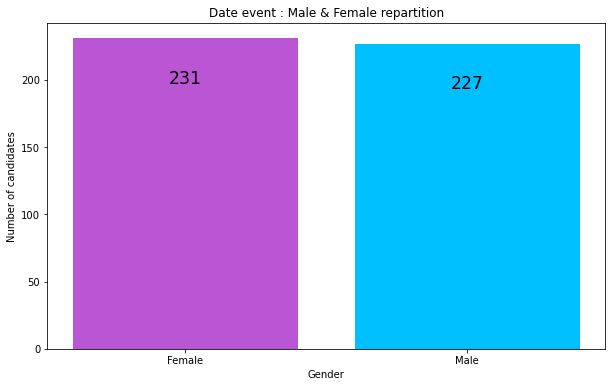

In [37]:
# Male & Female repartition
plt.figure(figsize = (10, 6))

plt.text(gender[0],gender_values[0]*0.9, np.round(gender_values[0],2), ha = "center", va = "top", size='xx-large')
plt.text(gender[1],gender_values[1]*0.9, np.round(gender_values[1],2), ha = "center", va = "top", size='xx-large')

plt.bar(gender, gender_values, color=['mediumorchid', 'deepskyblue'])
plt.title("Date event : Male & Female repartition")
plt.xlabel("Gender")
plt.ylabel("Number of candidates")
plt.show()

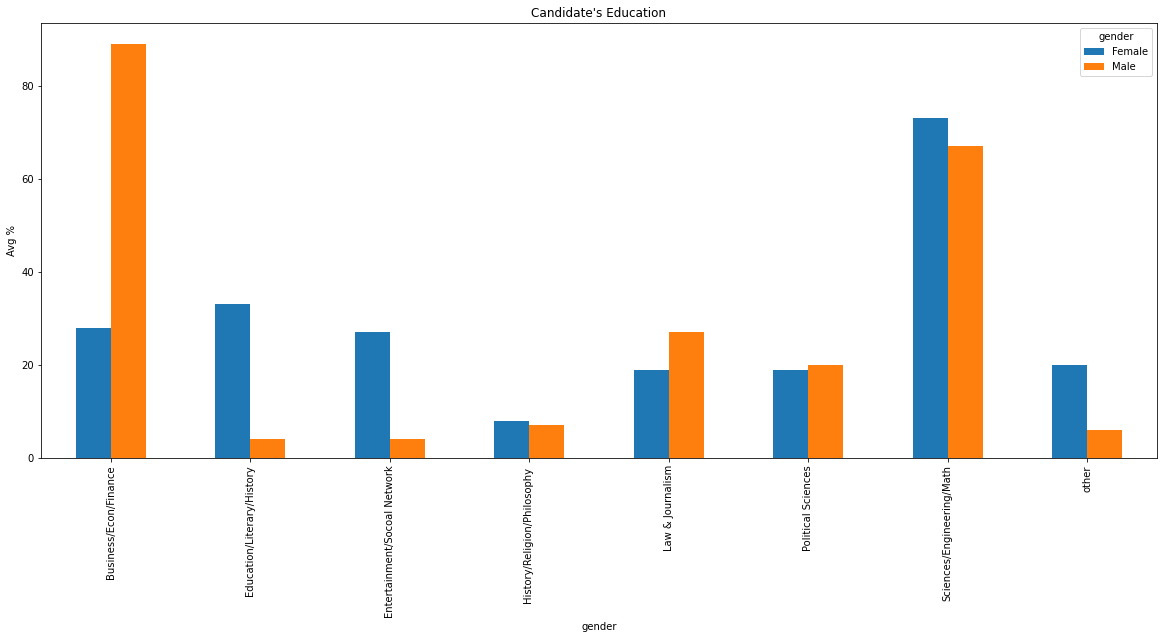

In [38]:
study_resume_gender_table.plot(kind='bar', title='Candidate\'s Education', ylabel='Avg %',
         xlabel='gender', figsize=(20, 8), legend = True)

plt.bar 

#for i in range(len(study_resume_gender_table)):
 #   plt.text(study_resume_gender_table.index[i],study_resume_gender_table.values[i][0],np.round(study_resume_gender_table['Female'][0],2),ha = "center", va = "top", size='x-large').all()



#plt.text(gender[1],gender_values[1]*0.9, np.round(gender_values[1],2), ha = "center", va = "top", size='xx-large')
plt.show()

In [39]:
print('Here we see again than men are over represented in all field related to science and Law, for the rest women are dominant')

Here we see again than men are over represented in all field related to science and Law, for the rest women are dominant


## E) Matches & date candidate filter


### 1. Match selection


In [40]:
#Filter
mark = dfa2['match'] == 'Yes'
dfa2_matches = dfa2.loc[mark,:]

#Shape
dfa2_matches.shape
print('After having filtered only on the candidates that got a match, we now have {} raws and {} columns remaining.'.format(dfa2_matches.shape[0],dfa2_matches.shape[1]))

After having filtered only on the candidates that got a match, we now have 1149 raws and 36 columns remaining.


### 2. Filtering on date obtained


In [41]:
#Filter
mark2 = dfa2['nbr_dates'] > 0
dfa2_matches = dfa2_matches.loc[mark2,:]

#Shape
dfa2_matches.shape
print('After having filtered only on the candidates that got a date, we now have {} raws and {} columns remaining.'.format(dfa2_matches.shape[0],dfa2_matches.shape[1]))

After having filtered only on the candidates that got a date, we now have 1025 raws and 36 columns remaining.


### 3. Matched candidates : average dates


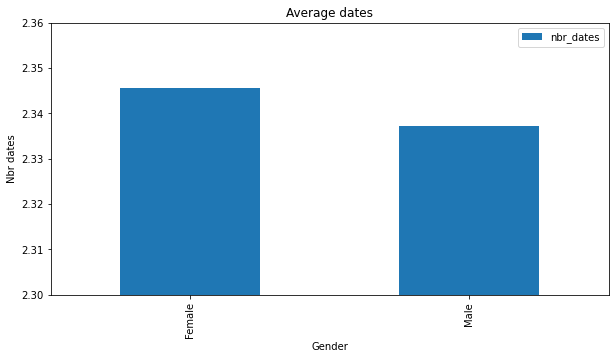

There is a real balance between the number of dates per gender, 2.35 for Females and 2.34 for Males.


In [42]:
avg_dates = dfa2_matches.groupby(['gender'])['nbr_dates'].mean()

avg_dates.index[0]
avg_dates[0]

avg_dates.plot(kind='bar', title='Average dates', ylabel='Nbr dates',
         xlabel='Gender', figsize=(10, 5), legend = True)

plt.ylim([2.30, 2.36])
plt.show()

print('There is a real balance between the number of dates per gender, {} for Females and {} for Males.'.format(round(avg_dates[0],2),round(avg_dates[1],2)))

### 4. Matched candidates : expectation from the partner


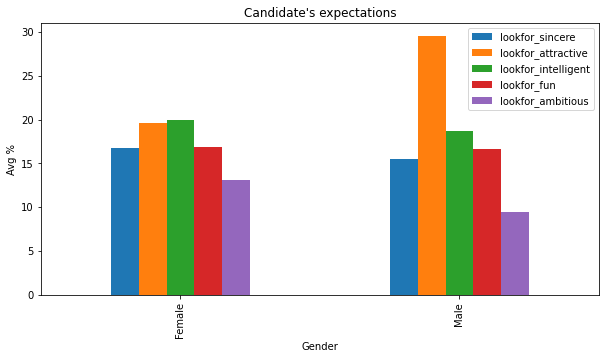


We can see that the expectations through gender are quite the same even we notice that the men are really likely to expext an attractive partner. 
Which means that the beauty is imprtant for them.


In [43]:
#Creation sub DataFrame & Filter
match_expectation = dfa2_matches[['gender',
                                  'lookfor_sincere',
                                  'lookfor_attractive',
                                  'lookfor_intelligent',
                                  'lookfor_fun',
                                  'lookfor_ambitious']]

#Sum up the main expectations
expectations = match_expectation.groupby(['gender']).mean()

#Transpose the DataFrame
expectations.T
female_mean = list(expectations.T['Female'])
female_male = list(expectations.T['Male'])

#Graph candidates' expectations
expectations.plot(kind='bar', 
                  title='Candidate\'s expectations', 
                  ylabel='Avg %',
                xlabel='Gender', 
                  figsize=(10, 5), 
                  legend = True)
plt.show()
print('')
print('We can see that the expectations through gender are quite the same even we notice that the men are really likely to expext an attractive partner. \nWhich means that the beauty is imprtant for them.')

### 5. Matched candidates : self evaluation


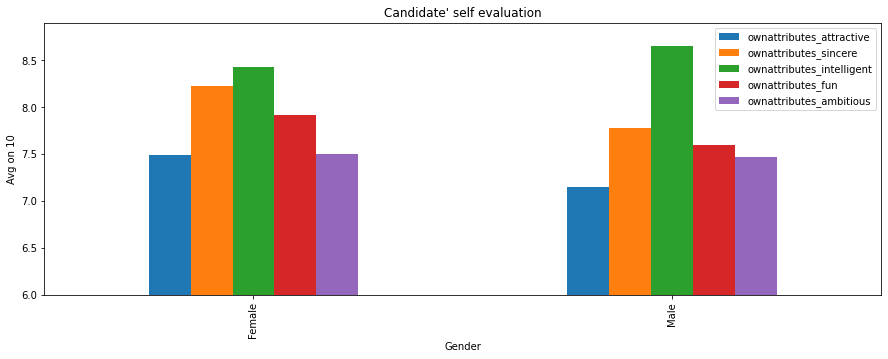

Observations : We can cleraly observe that persons that got a date are highly confident in themselves, they highly evaluate themselves.


In [44]:
#Creation sub DataFrame & Filter
own_attributes = dfa2_matches[['gender',
                              'ownattributes_attractive',
                              'ownattributes_sincere',
                              'ownattributes_intelligent',
                              'ownattributes_fun',
                              'ownattributes_ambitious']]

#Sum up the main attributes
self_evaluation = own_attributes.groupby(['gender']).mean()

#Transpose the DataFrame
self_evaluation.T

#Graph candidates' attributes
self_evaluation.plot(kind='bar', 
                     title='Candidate\' self evaluation', 
                     ylabel='Avg on 10',
                     xlabel='Gender', 
                     figsize=(15, 5), 
                     legend = True)
plt.ylim([6, 8.9])
plt.show()

print('Observations : We can cleraly observe that persons that got a date are highly confident in themselves, they highly evaluate themselves.')

### 6. Matched candidates : willingness to get a date after a match


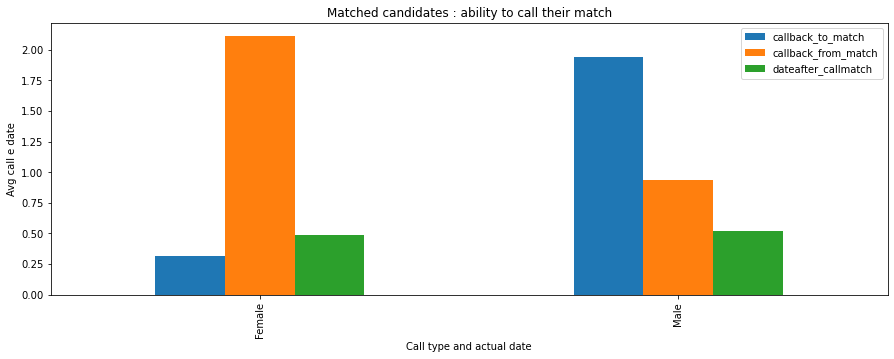

Man are often doing the first path to contact the partner. This do not impact the number of dates


In [45]:
#Creation sub DataFrame & Filter
dynamism = dfa2_matches[['gender',
                            'callback_to_match',
                            'callback_from_match',
                            'dateafter_callmatch'
                                  ]]

dynamism_to_call = dynamism.groupby(['gender']).mean()
dynamism_to_call


#Graph candidates' attributes
dynamism_to_call.plot(kind='bar', 
                      title='Matched candidates : ability to call their match', 
                      ylabel='Avg call e date',
                      xlabel='Call type and actual date', 
                      figsize=(15, 5), 
                      legend = True)
plt.show()

print('Man are often doing the first path to contact the partner. This do not impact the number of dates')

### 7. Matched candidates : go out frequency


,callback_to_match,callback_from_match,dateafter_callmatch
go_out_frequence,,,
1.Really often,1.093596,2.019704,0.512315
2.0ften,0.884058,1.647343,0.536232
3.Normal,0.939130,1.086957,0.478261
4.Rarely,1.923077,0.461538,0.307692
5.Extremely rarely,0.400000,0.800000,0.200000


 
------- ****** -------
------- ****** -------
 


,nbr_dates
go_out_frequence,
1.Really often,2.249300
2.0ften,2.375321
3.Normal,2.424658
4.Rarely,2.475000
5.Extremely rarely,2.285714


 
------- ****** -------
------- ****** -------
 


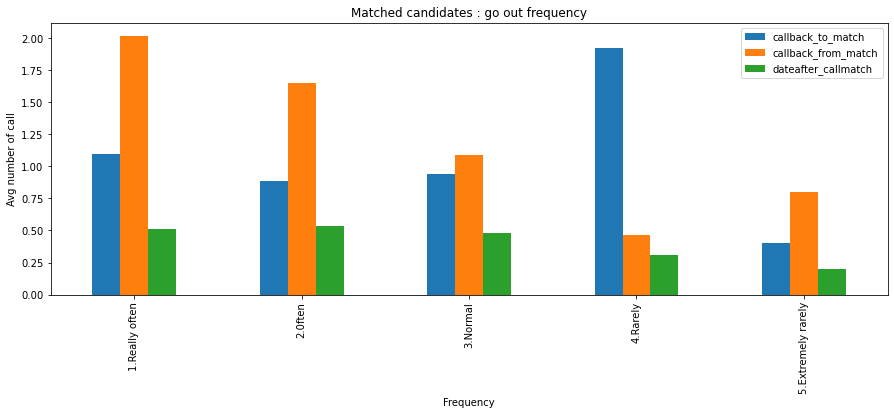

 
------- ****** -------
------- ****** -------
 


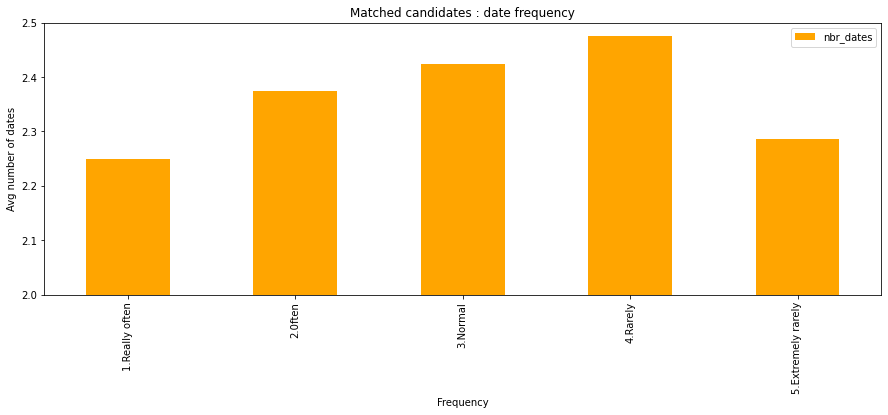

In [46]:
#Creation sub DataFrame & Filter
go_out_freq = dfa2_matches[['gender',
                            'date_frequence',
                            'go_out_frequence',
                            'callback_to_match',
                            'callback_from_match',
                            'dateafter_callmatch']]

freq_out_date = dfa2_matches[['gender',
                              'go_out_frequence',
                            'nbr_dates']]

#Average candidates by go out frequency and call
freq_out = go_out_freq.groupby(['go_out_frequence']).mean()
display(freq_out)

print(' ')
print('------- ****** -------')
print('------- ****** -------')
print(' ')

# Average date by go out frequency
freq_out_date = freq_out_date.groupby(['go_out_frequence']).mean()
display(freq_out_date)

print(' ')
print('------- ****** -------')
print('------- ****** -------')
print(' ')

#Graph candidates' go out frequency
freq_out.plot(kind='bar', 
              title='Matched candidates : go out frequency', 
              ylabel='Avg number of call',
              xlabel='Frequency', 
              figsize=(15, 5), 
              legend = True)
plt.show()

print(' ')
print('------- ****** -------')
print('------- ****** -------')
print(' ')

# Average date by go out frequency for a date
freq_out_date.plot(kind='bar', 
                   title='Matched candidates : date frequency', 
                   ylabel='Avg number of dates',
                   xlabel='Frequency', 
                   figsize=(15, 5), 
                   legend = True, 
                   color='orange')

plt.ylim([2, 2.5])
plt.show()

### 8. Matched candidates : date frequency


,callback_to_match,callback_from_match,dateafter_callmatch
date_frequence,,,
1.Really often,0.000000,1.142857,0.571429
2.0ften,0.578947,1.842105,0.631579
3.Normal,0.885714,1.628571,0.171429
4.Rarely,0.910156,1.480469,0.617188
5.Extremely rarely,1.269608,1.745098,0.455882


 
------- ****** -------
------- ****** -------
 


,nbr_dates
date_frequence,
1.Really often,2.666667
2.0ften,2.312500
3.Normal,2.318519
4.Rarely,2.366071
5.Extremely rarely,2.325581


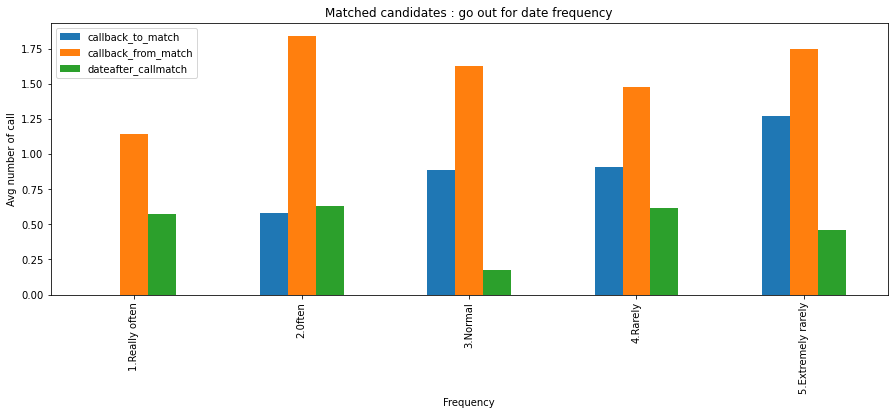

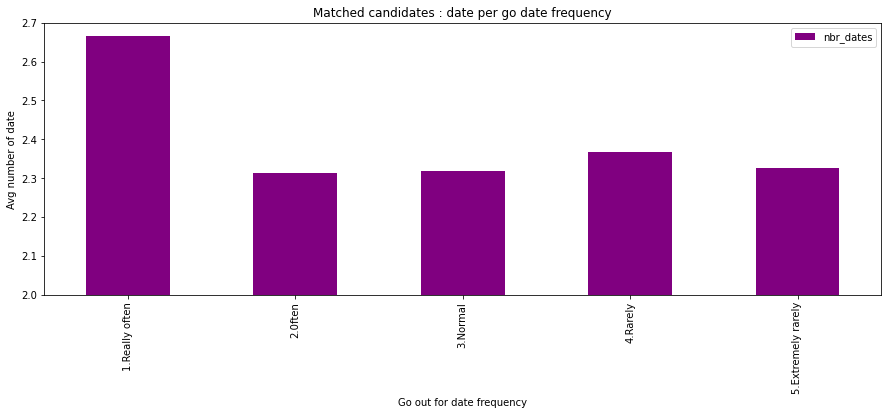

We can observe that people that are used to go out for date are slightly more likly to date after a match


In [47]:
#Creation sub DataFrame & Filter
freq_date_out = dfa2_matches[['gender',
                            'date_frequence',
                            'nbr_dates']]

#Average candidates by go out frequency and call
freq_date = go_out_freq.groupby(['date_frequence']).mean()
display(freq_date)

print(' ')
print('------- ****** -------')
print('------- ****** -------')
print(' ')

# Average date by go out frequency
freq_date_date = freq_date_out.groupby(['date_frequence']).mean()
display(freq_date_date)


#Graph candidates' go out frequency
freq_date.plot(kind='bar', 
               title='Matched candidates : go out for date frequency', 
               ylabel='Avg number of call',
               xlabel='Frequency', 
               figsize=(15, 5), 
               legend = True)
plt.show()

freq_date_date.plot(kind='bar', 
                    title='Matched candidates : date per go date frequency', 
                    ylabel='Avg number of date',
                    xlabel='Go out for date frequency', 
                    figsize=(15, 5), 
                    legend = True, color='purple')
plt.ylim([2, 2.7])
plt.show()

print('We can observe that people that are used to go out for date are slightly more likly to date after a match')

## F) REMOVE NOT USEFUL COLUMNS
---

In [48]:
df_final_dates = dfa2_matches.drop(columns=['choice',
                                       'wave',
                                       'candidates_wave',
                                       'age_partner',
                                       'partner_id',
                                       'canidates_correl',
                                       'equal_race',
                                       'race_partner',
                                       'race_importance',
                                       'religion_importance',
                                       'city',
                                       'income',
                                       'career_candidate'])

df_final_dates.shape
print('We have removed {} columns.'.format((dfa2_matches.shape[1]-df_final_dates.shape[1]))

We have removed 13 columns.


### Export last version of the DataFrame to CSV

In [68]:
df_final_dates.to_csv('df_final_dates.csv')
print('* This export is the output of our approach and analysis.\n\
* Its structure (export file): {} raws and {} columns.\n\
* Between the starting dataset and our export dataset we removed {} raws and {} columns.'\
      .format(df_final_dates.shape[0],
                  df_final_dates.shape[1],
                      (df.shape[0]-df_final_dates.shape[0]),
                          (df.shape[1]-df_final_dates.shape[1])
                                                                 )
                                                                     )

* This export is the output of our approach and analysis.
* Its structure (export file): 1025 raws and 23 columns.
* Between the starting dataset and our export dataset we removed 5812 raws and 172 columns.


### **4. Conclusion**

**The study of this dataset gives us some of the following findings:**

- Almost all candidates are aged under 30, therefore rarelly a candidate that have a match is above 35.
- There is no evidence of a clear race impact to have a match or have a date
- The repartition between Male and Female is balanced
- In average Female get 2.35 and Male 2.34 dates after the event


**What are the main people expectations from the partner in order to give a match:**
- Male considere the attractivness as the most important element above all
- Female have partner expectations more balanced, they will considere equally the atractivness and the intelligence


**People that highly evaluate themselves seems confident : they get more dates**
- Both gender see themselves as intelligent and sincere 



*After a match, the candidates must call the partner to schedule a rendez-vous:*
- Male are 8 time more likely to callback a female partner after the match, it might explain why male actually get slightly more date than women (51%)

*People in function of the frequency of go out or go out for date*
- More the candidates is used to go out for date less it would callback to the partner.
- Candidates that "really often" go out for date **never** callback their partners but have the highest average date
- Hopfully the frequency of go out does not impact the average number of date received
- The people that are only used to go out regularly often call back

As seen before, wether de frequency of go out and go out for date, Male generally callback their partner first to schedule a date.

**Conclusion: in order maximize the probability to get a match, our study highlights that it's better to be self confident and have a high level of study.**
